## Symbolic derivation qubit-cavity-NR with one DriveHamiltonian

<style>
p {
    font-family: "Liberation Serif", serif;
    font-size: 12pt;
}
</style>


Based on: J. R. Johansson (robert@riken.jp), [http://jrjohansson.github.io](http://jrjohansson.github.io), and Eunjong Kim.

## Setup modules

In [1]:
from sympy import *
init_printing()

In [2]:
from sympsi import *
from sympsi.boson import *
from sympsi.pauli import *

## The Jaynes-Cummings model

The [Jaynes-Cummings model](http://en.wikipedia.org/wiki/Jaynes%E2%80%93Cummings_model) is one of the most elementary quantum mechanical models light-matter interaction. It describes a single two-level atom that interacts with a single harmonic-oscillator mode of a electromagnetic cavity.

The Hamiltonian for a two-level system in its eigenbasis can be written as

$$
H = \frac{1}{2}\omega_q \sigma_z
$$

and the Hamiltonian of a quantum harmonic oscillator (cavity or nanomechanical resonator, NR) is

$$
H = \hbar\omega_r (a^\dagger a + 1/2)
$$

$$
H = \hbar\omega_{NR} (b^\dagger b + 1/2)
$$

The atom interacts with the electromagnetic field produced by the cavity (NR) mode $a + a^\dagger$ ($b + b^\dagger$) through its dipole moment. The dipole-transition operators is $\sigma_x$ (which cause a transition from the two dipole states of the atom). The combined atom-cavity Hamiltonian can therefore be written in the form

$$
H = 
\hbar \omega_r (a^\dagger a + 1/2)
+
\hbar \omega_{NR} (b^\dagger b + 1/2)
+ \frac{1}{2}\hbar\Omega\sigma_z 
+
\hbar
\sigma_x \left( g(a + a^\dagger)
+
\lambda(b + b^\dagger)\right)
$$




Although the Jaynes-Cumming Hamiltonian allow us to evolve the given initial state according to the Schrödinger Equation, in an experiment we would like to predicte the response of the coupled cavity-NR-qubit system under the influence of driving fields for the cavity and qubit, and also account for the effects of dissipation and dephasing (not treated here)

The external coherent-state input may be incorporated in the Jaynes-Cummings Hamiltonian by addition of terms involving the amplitude of the driving field $\vec{E_d} \left(\vec{E_s}\right)$ and it's frequency $\omega_d\left(\omega_s\right)$

$$
H_{cavity} = 
E_d \left(e^{i\omega_dt}a +e^{-i\omega_dt}a^\dagger\right)
$$

$$
H_{qubit} = 
E_s \left(e^{i\omega_st}\sigma_- +e^{-i\omega_st}\sigma_+\right)
$$

$$
H_{NR} = 
E_p \left(e^{i\omega_st}b +e^{-i\omega_st}b^\dagger\right)
$$

To obtain the Jaynes-Cumming Hamiltonian 

$$
?
H = 
\hbar\omega_r (a^\dagger a + 1/2)
%-\frac{1}{2}\Delta\sigma_x 
+ \frac{1}{2}\hbar\Omega\sigma_z 
+
\hbar
\sigma_x \left( g(a + a^\dagger)
+
\lambda(b + b^\dagger)\right)
$$

we also need to perform a rotating-wave approximation which simplifies the interaction part of the Hamiltonian. In the following we will begin with looking at how these two Hamiltonians are related.

To represent the atom-cavity Hamiltonian in SymPy we creates an instances of the operator classes `BosonOp` and `SigmaX`, `SigmaY`, and `SigmaZ`, and use these to construct the Hamiltonian (we work in units where $\hbar = 1$).

In [3]:
# CPW, qubit and NR energies
omega_r, omega_q, omega_nr = symbols("omega_r, omega_q, omega_{NR}") 
# Coupling CPW-qubit, NR_qubit
g, L, chi, eps = symbols("g, lambda, chi, epsilon")
# Detuning 

# Drives and detunnings

Delta_d, Delta_s, Delta_p  = symbols(" Delta_d, Delta_s, Delta_p ")

A, B, C = symbols("A,B,C") # Electric field amplitude

omega_d, omega_s, omega_p = symbols("omega_d, omega_s, omega_p") # drive frequencies

# Detunning CPW-qubit, NR-qubit

Delta_CPW, Delta_NR = symbols("Delta_{CPW},Delta_{NR}")

# auxilary variables

x, y, t, Hsym = symbols("x, y, t, H ") 

Delta_SP, Delta_SD = symbols("Delta_{SP},Delta_{SD}")

In [4]:
# omega_r, omega_q, g, Delta_d, Delta_s, t, x, chi, Hsym = symbols("omega_r, omega_q, g, Delta_d, Delta_s, t, x, chi, H")

# A, B, C = symbols("A,B,C") # Electric field amplitude

# omega_d, omega_s = symbols("omega_d, omega_s") # 

# omega_nr, L = symbols("omega_{NR},lambda")

# Delta,Delta_t = symbols("Delta,Delta_t")

# y, omega_t = symbols("y, omega_t")

In [5]:

sx, sy, sz, sm, sp = SigmaX(), SigmaY(), SigmaZ(), SigmaMinus(), SigmaPlus()
a = BosonOp("a")
b = BosonOp("b")

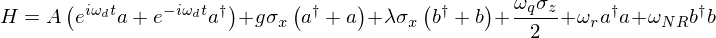

In [6]:
H = omega_r * Dagger(a) * a + omega_q/2 * sz + omega_nr * Dagger(b) * b 

H_int = sx*(g  * (a + Dagger(a)))
H_int_2 = sx *( L * (b + Dagger(b)))


H_drive_r = A * (exp(I*omega_d*t)*a + exp(-I*omega_d*t)*Dagger(a))
H_drive_q = B * (exp(I*omega_s*t)*sm + exp(-I*omega_s*t)*sp)
H_drive_NR = C * (exp(I*omega_p*t)*b + exp(-I*omega_p*t)*Dagger(b))
H_total  =  H +   H_drive_r  + H_int + H_int_2#+ H_drive_q + H_drive_NR #+ H_int + H_int_2 +
Eq(Hsym,H_total)


In [7]:
# trick to simplify exponents
def simplify_exp(e):
    if isinstance(e, exp):
        return exp(simplify(e.exp.expand()))

    if isinstance(e, (Add, Mul)):
        return type(e)(*(simplify_exp(arg) for arg in e.args)) 

    return e

##Linearized Interaction

In [23]:

U = exp(I *Dagger(a)*a * omega_d * t )

U

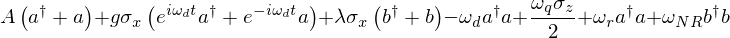

In [24]:

H1 = hamiltonian_transformation(U, H_total, independent=True)

H1

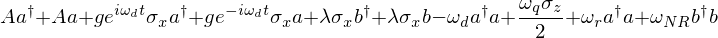

In [25]:
H2 = drop_terms_containing(H1.expand(), [exp(-2*I*omega_d*t), exp(2*I*omega_d*t)])
H2

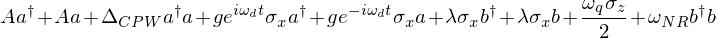

In [26]:
H3 = H2.subs(omega_r, Delta_CPW + omega_d).expand()

H3

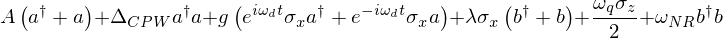

In [27]:
collect(H3, [g,L*sx, A])

In [17]:
U = exp(I * sx * (Dagger(a)+a) * omega_d* t)
U

In [18]:
H4 = hamiltonian_transformation(U, H3, independent=True)

H4

Failed to identify series expansions: list index out of range


AttributeError: 'IndexError' object has no attribute 'subs'

In [ ]:
collect(H4, [g*sx,L*sx,A])